In [ ]:
# install the dependencies
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [ ]:
#load the data
from google.colab import files
uploaded = files.upload()

Saving ZACKS-FR_quandl.csv to ZACKS-FR_quandl.csv


In [ ]:
#store the data into a df
quandl_df = pd.read_csv('ZACKS-FR_quandl.csv')
quandl_df.head(10)

,m_ticker,ticker,comp_name,comp_name_2,exchange,currency_code,per_end_date,per_type,per_code,per_fisc_year,per_fisc_qtr,per_cal_year,per_cal_qtr,form_7_type,curr_ratio,non_perform_asset_tot_loan,loan_loss_reserve,lterm_debt_cap,tot_debt_tot_equity,gross_margin,oper_profit_margin,ebit_margin,ebitda_margin,pretax_profit_margin,profit_margin,free_cash_flow,loss_ratio,exp_ratio,comb_ratio,asset_turn,invty_turn,rcv_turn,day_sale_rcv,ret_equity,ret_tang_equity,ret_asset,ret_invst,free_cash_flow_per_share,book_val_per_share,oper_cash_flow_per_share
0,AAPL,AAPL,APPLE INC,Apple Inc.,NSDQ,USD,2018-09-30,A,NaN,2018,4,2018,3,7,1.1329,NaN,NaN,0.4666,1.0685,38.3437,26.6940,26.6940,30.7992,27.4489,22.4142,64121.0,NaN,NaN,NaN,0.7262,41.3943,5.4209,67.3325,55.5601,55.5601,16.2775,29.6348,12.8239,22.5336,15.4865
1,AAPL,AAPL,APPLE INC,Apple Inc.,NSDQ,USD,2018-03-31,Q,NaN,2018,2,2018,1,7,1.4560,NaN,NaN,0.4441,0.9603,38.3107,25.9974,25.9974,NaN,26.4455,22.6082,36418.0,NaN,NaN,NaN,0.1664,4.9223,2.7284,32.9869,10.8939,10.8939,3.7611,6.0559,7.1852,25.6668,8.5672
2,AAPL,AAPL,APPLE INC,Apple Inc.,NSDQ,USD,2018-06-30,Q,NaN,2018,3,2018,2,7,1.3073,NaN,NaN,0.4580,0.9970,38.3385,23.6778,23.6778,NaN,24.9395,21.6258,47639.0,NaN,NaN,NaN,0.1525,5.5330,2.0201,44.5514,10.0210,10.0210,3.2987,5.4315,9.6697,23.7355,11.7547
3,AAPL,AAPL,APPLE INC,Apple Inc.,NSDQ,USD,2018-09-30,Q,NaN,2018,4,2018,3,7,1.1329,NaN,NaN,0.4666,1.0685,38.2894,25.6248,25.6248,NaN,26.1065,22.4563,64121.0,NaN,NaN,NaN,0.1720,9.8119,1.2838,70.1041,13.1828,13.1828,3.8622,7.0315,12.8239,22.5336,15.4865
4,AAPL,AAPL,APPLE INC,Apple Inc.,NSDQ,USD,2018-12-31,Q,NaN,2019,1,2018,4,7,1.3006,NaN,NaN,0.4410,0.9732,37.9919,27.6907,27.6907,NaN,28.3549,23.6805,23335.0,NaN,NaN,NaN,0.2256,10.4810,2.2798,39.4768,16.9350,16.9350,5.3422,9.4674,4.8887,24.9254,5.5916
5,AXP,AXP,AMER EXPRESS CO,American Express Company,NYSE,USD,2018-12-31,A,NaN,2018,4,2018,4,7,NaN,NaN,NaN,0.7238,2.7601,NaN,NaN,NaN,NaN,21.9597,18.3502,7620.0,NaN,NaN,NaN,0.1961,NaN,NaN,NaN,31.0498,31.0498,3.6696,8.5748,8.8708,26.3164,10.3958
6,AXP,AXP,AMER EXPRESS CO,American Express Company,NYSE,USD,2018-03-31,Q,NaN,2018,1,2018,1,7,NaN,NaN,NaN,0.7279,2.8934,NaN,NaN,NaN,NaN,23.2808,17.8911,1826.0,NaN,NaN,NaN,0.0497,NaN,NaN,NaN,8.3312,8.3312,0.9080,2.2671,2.1208,22.8058,2.3961
7,AXP,AXP,AMER EXPRESS CO,American Express Company,NYSE,USD,2018-06-30,Q,NaN,2018,2,2018,2,7,NaN,NaN,NaN,0.7279,2.8756,NaN,NaN,NaN,NaN,22.7382,17.3010,4560.0,NaN,NaN,NaN,0.0497,NaN,NaN,NaN,7.7685,7.7685,0.8780,2.1140,5.2900,24.2648,5.9118
8,AXP,AXP,AMER EXPRESS CO,American Express Company,NYSE,USD,2018-09-30,Q,NaN,2018,3,2018,3,7,NaN,NaN,NaN,0.7204,2.7801,NaN,NaN,NaN,NaN,22.7083,17.3797,9311.0,NaN,NaN,NaN,0.0493,NaN,NaN,NaN,7.7074,7.7074,0.8747,2.1548,10.8267,25.1288,11.8395
9,AXP,AXP,AMER EXPRESS CO,American Express Company,NYSE,USD,2018-12-31,Q,NaN,2018,4,2018,4,7,NaN,NaN,NaN,0.7238,2.7601,NaN,NaN,NaN,NaN,19.2332,20.7458,7620.0,NaN,NaN,NaN,0.0505,NaN,NaN,NaN,9.0175,9.0175,1.0657,2.4903,8.8708,26.3164,10.3958


In [ ]:
quandl_reduced_df = quandl_df[["ticker", "ret_equity", "ret_asset", "ret_invst"]]
quandl_reduced_df.head(10)

,ticker,ret_equity,ret_asset,ret_invst
0,AAPL,55.5601,16.2775,29.6348
1,AAPL,10.8939,3.7611,6.0559
2,AAPL,10.0210,3.2987,5.4315
3,AAPL,13.1828,3.8622,7.0315
4,AAPL,16.9350,5.3422,9.4674
5,AXP,31.0498,3.6696,8.5748
6,AXP,8.3312,0.9080,2.2671
7,AXP,7.7685,0.8780,2.1140
8,AXP,7.7074,0.8747,2.1548
9,AXP,9.0175,1.0657,2.4903


In [ ]:
quandl_reduced_df.shape

(145, 4)

In [ ]:
#set index
quandl_reduced_df = quandl_reduced_df.set_index('ticker')

#convert values to floats
quandl_reduced_df = quandl_reduced_df.astype('float')

quandl_reduced_df.head()

,ret_equity,ret_asset,ret_invst
ticker,,,
AAPL,55.5601,16.2775,29.6348
AAPL,10.8939,3.7611,6.0559
AAPL,10.0210,3.2987,5.4315
AAPL,13.1828,3.8622,7.0315
AAPL,16.9350,5.3422,9.4674


In [ ]:
#create a statistical summary table
init_descr_df = quandl_reduced_df.describe()

init_descr_df

,ret_equity,ret_asset,ret_invst
count,145.000000,145.000000,145.000000
mean,37.340117,3.178989,6.442657
std,229.904512,3.954391,10.312832
min,-195.450800,-7.383600,-15.883000
25%,3.126000,1.142800,2.196400
50%,6.614100,2.206700,4.180400
75%,11.587900,4.078500,6.945500
max,2551.219000,19.380600,94.515200


In [ ]:
 #Remove outliers by filtering items differing from industry averages (ROE and ROA above seem off)
 roe_filter = quandl_reduced_df.iloc[:,0] < 40
 roa_filter = quandl_reduced_df.iloc[:,1] < 30
 roi_filter = quandl_reduced_df.iloc[:,2] < 30

 #get the counts for each column
 roe_count = pd.Series(roe_filter).value_counts()
 roa_count = pd.Series(roa_filter).value_counts()
 roi_count = pd.Series(roi_filter).value_counts()

 display(roe_count)
 display(roa_count)
 display(roi_count)

True     133
False     12
Name: ret_equity, dtype: int64

True    145
Name: ret_asset, dtype: int64

True     142
False      3
Name: ret_invst, dtype: int64

In [ ]:
#apply all filters
filtered_df = quandl_reduced_df[roe_filter & roa_filter & roi_filter]

#get new dataframe shape
#filtered_df.shape

#display new dataframe
filtered_df.head()


,ret_equity,ret_asset,ret_invst
ticker,,,
AAPL,10.8939,3.7611,6.0559
AAPL,10.0210,3.2987,5.4315
AAPL,13.1828,3.8622,7.0315
AAPL,16.9350,5.3422,9.4674
AXP,31.0498,3.6696,8.5748


In [ ]:
#create a statistical summary table
descr_df = filtered_df.describe()

descr_df

,ret_equity,ret_asset,ret_invst
count,133.000000,133.000000,133.000000
mean,2.870955,2.696352,4.717523
std,26.683169,3.426107,5.852097
min,-195.450800,-7.383600,-15.883000
25%,2.911400,1.065700,2.108100
50%,6.138700,2.136800,3.892700
75%,10.726800,3.735100,5.868600
max,36.098300,18.055700,25.468900


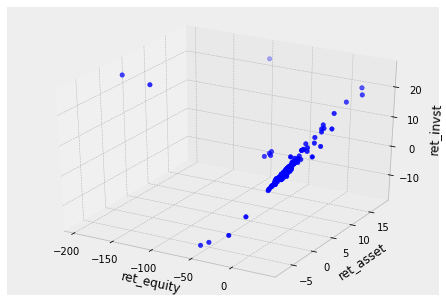

In [ ]:
#Plot the data
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#define the figure
fig = plt.figure()
ax = Axes3D(fig)

#define x,y,z axes
x = list(filtered_df.iloc[:,0])
y = list(filtered_df.iloc[:,1])
z = list(filtered_df.iloc[:,2])

#define the axis labels
column_names = filtered_df.columns
ax.set_xlabel(column_names[0])
ax.set_ylabel(column_names[1])
ax.set_zlabel(column_names[2])

#define the markers and the color
ax.scatter(x,y,z, c='blue', marker = 'o')

plt.show()

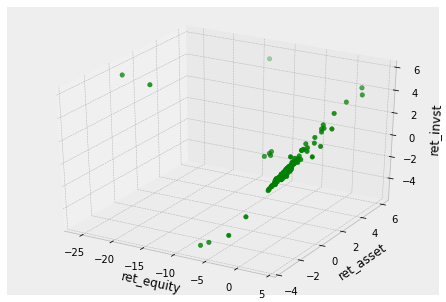

In [ ]:
#scale the data using sklearn Robust Scaler since may still be outliers
from sklearn.preprocessing import RobustScaler

#define scaler mechanism
robust_scaler = RobustScaler()

#scale the data
X_train_robust = robust_scaler.fit_transform(filtered_df)

#define the new figure
fig = plt.figure()
ax = Axes3D(fig)

#define x,y,z axes
x = X_train_robust[:,0]
y = X_train_robust[:,1]
z = X_train_robust[:,2]

#define the axis labels
column_names = filtered_df.columns
ax.set_xlabel(column_names[0])
ax.set_ylabel(column_names[1])
ax.set_zlabel(column_names[2])

#define the markers and the color
ax.scatter(x,y,z, c='green', marker = 'o')

plt.show()

In [ ]:
#Silhouette Analysis to determine how many clusters to choose

from sklearn.cluster import KMeans
from sklearn import metrics

#create a dictionary to store our scores
results_dict = {}

#define the number of iterations we want to do
num_of_clusters = 10

#run through each k
for k in range(2, num_of_clusters):

  print('_'*100)

  #define the key for this iteration
  results_dict[k] = {}

  #create an instance of the kmeans model
  kmeans = KMeans(n_clusters = k, random_state = 0).fit(X_train_robust)

  #define the silhouette score
  sil_score = metrics.silhouette_score(X_train_robust, kmeans.labels_, metric = 'euclidean')

  #store the different metrics
  results_dict[k]['silhouette_score'] = sil_score
  results_dict[k]['inertia'] = kmeans.inertia_
  results_dict[k]['score'] = kmeans.score
  results_dict[k]['model'] = kmeans 

  #Print out the results
  print("The number of clusters: {}".format(k))
  print("Silhouette score: {}".format(sil_score))


____________________________________________________________________________________________________
The number of clusters: 2
Silhouette score: 0.8790777956420563
____________________________________________________________________________________________________
The number of clusters: 3
Silhouette score: 0.5795437528472792
____________________________________________________________________________________________________
The number of clusters: 4
Silhouette score: 0.6418399044647236
____________________________________________________________________________________________________
The number of clusters: 5
Silhouette score: 0.6404567827105097
____________________________________________________________________________________________________
The number of clusters: 6
Silhouette score: 0.6521211591749732
____________________________________________________________________________________________________
The number of clusters: 7
Silhouette score: 0.46109723011311976
_______________

In [ ]:
#interpretation - the larger the Silhouette score, the better the results. 2, 4, and 6 have highest number


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


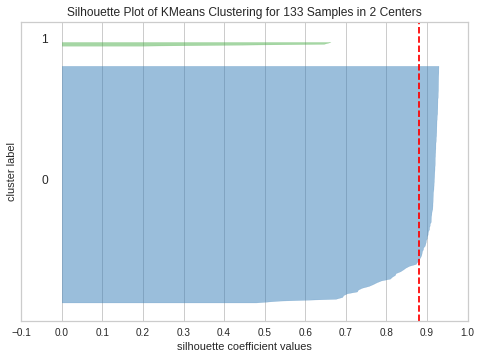

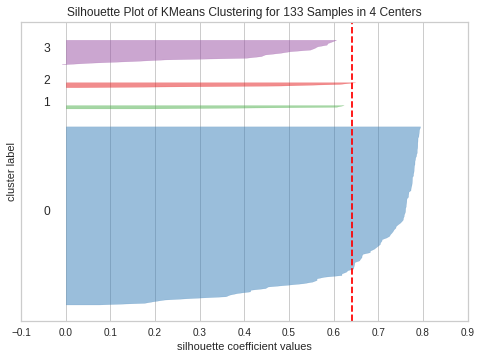

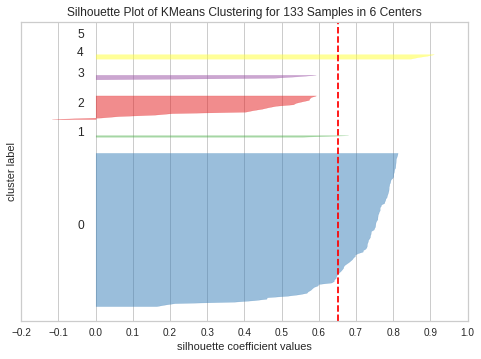

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

clusters = [2,4,6]

for cluster in clusters:

  #create an instance of the kmeans model
  kmeans = KMeans(n_clusters = cluster, random_state = 0)

  #pass the model thru the visualizer
  visualizer = SilhouetteVisualizer(kmeans)

  #fit the data
  visualizer.fit(X_train_robust)

  #show the chart
  visualizer.poof()

In [ ]:
#interpretation - 4 clusters seems to have the most equitable breakdown of component data, with all clusters approaching the red line/average

____________________________________________________________________________________________________


/usr/local/lib/python3.6/dist-packages/mpl_toolkits/mplot3d/art3d.py:794: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
/usr/local/lib/python3.6/dist-packages/mpl_toolkits/mplot3d/art3d.py:796: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':


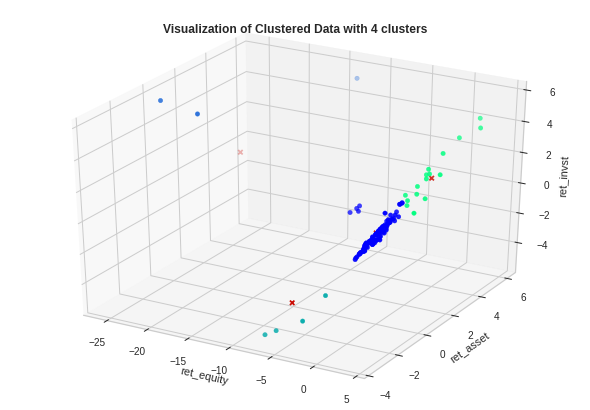

In [ ]:
#Plot the data with clusters
clusters = [4]

for cluster in clusters:

  print('_'*100)

  #create an instance of the kmeans model
  kmeans = KMeans(n_clusters = cluster, random_state = 0).fit(X_train_robust)

  #define our clusters
  cluster_centers = kmeans.cluster_centers_
  C1 = cluster_centers[:,0]
  C2 = cluster_centers[:,1]
  C3 = cluster_centers[:,1]
  C4 = cluster_centers[:,2]
  

  #define the new figure
  fig = plt.figure()
  ax = Axes3D(fig)

  #define x,y,z axes
  x = X_train_robust[:,0]
  y = X_train_robust[:,1]
  z = X_train_robust[:,2]

  #define the axis labels
  column_names = filtered_df.columns
  ax.set_xlabel(column_names[0])
  ax.set_ylabel(column_names[1])
  ax.set_zlabel(column_names[2])

  #define the markers and the color
  ax.scatter(x,y,z, c=kmeans.labels_.astype(float), cmap = 'winter', marker = 'o')
  ax.scatter(C1, C2, C3, C4, marker = 'x', color = 'r')

  #define the title
  plt.title("Visualization of Clustered Data with {} clusters".format(cluster), fontweight='bold')

  plt.show()


In [ ]:
#MAKE PREDICTIONS

#reference your model
kmeans = results_dict[4]['model']

#define some test data (Two companies with [Ret_Equity, Ret_Asset, Ret_Invst] figures given)
test_data = [[-8.50, 6.33, -3.00],
             [3.62, 2.75, 5.61]]

#make prediction
kmeans.predict(test_data)

array([2, 3], dtype=int32)

In [ ]:
#Model predicts that our negative test data falls in cluster 2 (performing less well), and the positive test data falls in cluster 3 - which is on the better-performing side of the plot.  

In [ ]:
#CONCLUSIONS:  Clustering can be useful, but the more data you have the more likely you are to see patterns